In [4]:
reload(matplotlib)

/Users/isaac/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)


<module 'matplotlib' from '/Users/isaac/anaconda/lib/python2.7/site-packages/matplotlib/__init__.pyc'>

In [52]:
import matplotlib
matplotlib.__version__
import seaborn as sns

In [53]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/isaac/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Learning Objectives

1. Name and recognize the two interfaces to matplotlib
2. Be able to use both interfaces to generate charts
3. Understand the connection between matplotlib and seaborne/pandas
4. Make plots with multiple datasets, and figures
5. Know the recommended functional form for writing your own plotting functions

# Plotting in Python

There are many libraries for doing plotting in Python. Some you may encounter
* Plotly
* Bokeh
* **Matplotlib**
* **Seaborne**
* **Pandas**
* ggplot (port of R package of same name)

All of these aim to solve the same problem: allowing you to visualize your data.

# Appreciating the challenges

A good plotting library should:

* Be easy to use.
* Allow plotting of all kinds of data.
* Support arbitrarily fine-grained control.
* Support a variety of backends to make graphs in various formats.

# Matplotlib

While everyone has different opinions about what library is best, everybody knows and has used matplotlib. This makes it the de-facto choice for plotting in python.

## How does it work?

In an effort to make easy things easy, and hard things possible, matplotlib has a number of different levels at which it can be accessed. They are:

| Level | Control | Complexity |
|-------|---------|------------|
| plt | minimal, fast interface for plots, annotations | low |
| OO interface w/ pyplot | fine-grained control over figure, axes, etc. | medium |
| pure OO interface | Embed plots in GUI applicatione e.g. | too high |

# plt example

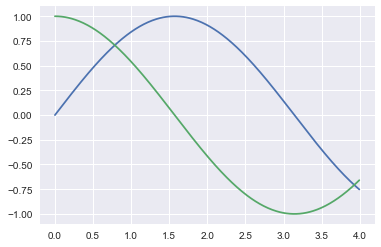

In [54]:
x_data = np.arange(0, 4, .011)
y_data = np.sin(x_data)
plt.plot(x_data, y_data)
plt.plot(x_data, np.cos(x_data))
plt.show()

In [55]:
type(plt)

module

In [56]:
type(plt.plot)

function

## Weird

`plt` was imported as a library, but it appears to be keeping some state between the last two lines above, behavior that we'd usually associate with objects.

In fact, `plt`, operates in a not-very-pythonic way.

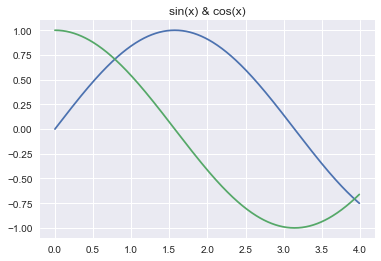

In [57]:
x_data = np.arange(0, 4, .01)
y_data = np.sin(x_data)
plt.plot(x_data, y_data)
#We can actually keep adding state here, and it will be 
#reflected when we finally call show.
plt.plot(x_data, np.cos(x_data))
plt.title("sin(x) & cos(x)")
plt.show()

If you thought it was strange that we were working in Python, but there didn't seem to be any objects required to make our image, join the club!

# Behind the curtain

![Matplotlib diagram](http://matplotlib.org/_images/fig_map.png)



In [58]:
plt.figure?

In [59]:
fig = plt.figure()
fig.add_subplot?

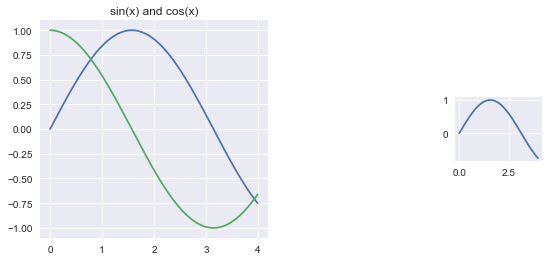

In [60]:
fig = plt.figure(figsize=(9,4))
ax = fig.add_subplot(121) #nrows, ncols, plotnumber
ax2 = fig.add_subplot(3, 5, 10)
ax.plot(x_data, y_data)
ax.plot(x_data, np.cos(x_data))
ax.set_title('sin(x) and cos(x)')
ax2.plot(x_data, y_data)
plt.show()

In this example, the fact that state is maintained is less surprising.

## Polling break 1

# Mix 'n' Match

Turns out, you can combine `plt` and object-oriented approach.

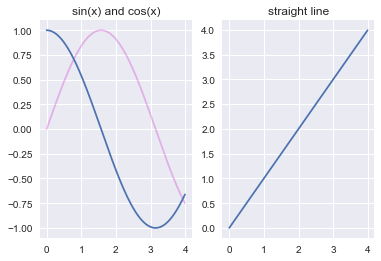

In [61]:
fig = plt.figure()
ax = fig.add_subplot(121)
plt.title('sin(x) and cos(x)')
ax2 = fig.add_subplot(1,2,2)
plt.title('straight line')
ax_ret = ax.plot(x_data, y_data, color='m', alpha=.25)
ax.plot(x_data, np.cos(x_data))
#ax_ret[0].set_alpha(.25)
ax2.plot(x_data, x_data)
plt.show()

In [62]:
line = ax_ret[0]
line.set_alpha(.25)

In [63]:
ax_ret

# Why should we use the OO oriented approach?

If we want to exercise fine-grained control over our plots that isn't offered via the `plt` shortcuts.

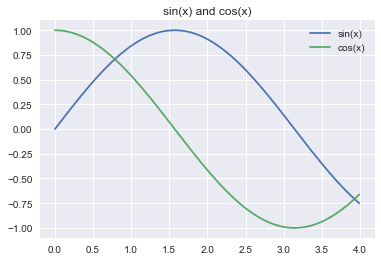

In [64]:
#Layout
fig = plt.figure()
ax = fig.add_subplot(111)
#Plotting
ax.plot(x_data, y_data, label='sin(x)')
ax.plot(x_data, np.cos(x_data), label='cos(x)')
ax.set_title('sin(x) and cos(x)')
ax.legend()

# Multiple plots

/Users/isaac/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log


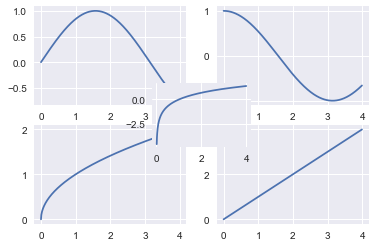

In [65]:
#Layout 2,2 with center pane.
fig, ax_list = plt.subplots(2, 2)
ax = fig.add_subplot(3, 3, 5)
#Draw on axes
y_funcs = [np.sin, np.cos, np.sqrt, lambda x: x]
for subp, y_func in zip(ax_list.flatten(), y_funcs):
    subp.plot(x_data, y_func(x_data))
ax.plot(x_data, np.log(x_data))

In [66]:
ax_list

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110974400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1131c1198>]], dtype=object)

# What about pandas?

In [67]:
import pandas as pd

In [68]:
df = pd.DataFrame({'x':x_data, 'sinx':np.sin(x_data), 'cosx':np.cos(x_data),
                  'rand':np.random.rand(len(x_data))})
df = df.set_index('x')
df.head()

,cosx,rand,sinx
x,,,
0.00,1.00000,0.845067,0.000000
0.01,0.99995,0.974333,0.010000
0.02,0.99980,0.960266,0.019999
0.03,0.99955,0.776198,0.029996
0.04,0.99920,0.506315,0.039989


In [69]:
df.cosx.plot?

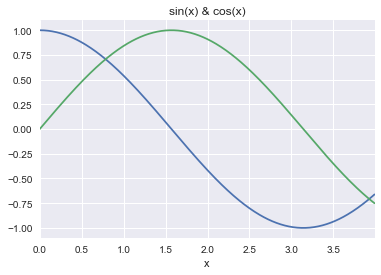

In [70]:
ax = df.cosx.plot()
ax.set_title('sin(x) & cos(x)')
df.sinx.plot()

Calling the plot method on a pandas series returns a familiar matplotlib axes object.

(-1, 1)

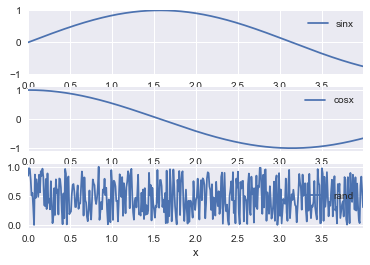

In [71]:
#We can also supply an axes object on which to draw!
fig, ax_list = plt.subplots(3,1)
cols = ['sinx', 'cosx', 'rand']
for ax, col in zip(ax_list, cols):
    df[col].plot(ax=ax)
    ax.legend()
top_ax = ax_list[0]
top_ax.set_ylim(bottom=-1, top=1)

In [72]:
def our_own(*args, **kwargs):
    print args, kwargs
our_own(1,2,3, one=1, two=2)

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-72-e33e41ac61b3>, line 2)

In [ ]:
data = (x_data, y_data)
plt.plot(*data)

In [ ]:
import sklearn.linear_model as lm

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ret_val = ax.plot(x_data, y_data)
ret_val

# Writing plotting functions

In [ ]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

In [ ]:
ax = fig.add_subplot(111)
ax.plot(x_data, y_data)
ax

# Example:
Let's write a function that draws some data, and some horizontal
lines representing the 25th and 75th percentile.

We'll call it iqr_plot.

### I do: 
a function for drawing a horizontal line at some point.

### We do: 
write the iqr_plot function.

### You do: 
make a 2 by 2 grid of plots using this function.


In [ ]:
def horizontal_line(ax, x_data, y):
    line = ax.hlines(y, min(x_data), max(x_data))
    return [line]

In [ ]:
def horizontal_line(ax, x_data, y):
    line = ax.hlines(y, min(x_data), max(x_data))
    return [line]
fig = plt.figure()
ax = fig.add_subplot(111)
horizontal_line(ax, x_data, .5)
plt.show()

In [ ]:
def iqr_plot(ax, x_data, y_data):
    #plot 3 things, 2 horizontal lines, data itself.
    data_line = ax.plot(x_data, y_data)
    pct_75 = np.percentile(y_data, 75)
    pct_25 = np.percentile(y_data, 25)
    upper = horizontal_line(ax, x_data, pct_75)
    lower = horizontal_line(ax, x_data, pct_25)
    return data_line + upper + lower
fig, axes = plt.subplots(1,1)
lines = iqr_plot(axes, x_data, y_data)
axes.set_title("IQR Plot")


In [ ]:
lines

In [ ]:
np.percentile?

In [ ]:
def iqr_plot(ax, x_data, y_data):
    #plot some data
    #plot 25th and 75th percentiles a lines
    p25, p75 = np.percentile(y_data, [25, 75])
    l1 = horizontal_line(ax, x_data, p25)
    l2 = horizontal_line(ax, x_data, p75)
    l3 = ax.plot(x_data, y_data)
    return l1 + l2 + l3
fig = plt.figure()
ax = fig.add_subplot(111)
iqr_plot(ax, x_data, np.sin(x_data))
plt.show()

In [ ]:
fig, ax_list = plt.subplots(2,2)
Y = [f(x_data) for f in [np.sin, np.cos, np.exp, lambda x: x**3]]
for ax, y_data in zip(ax_list.flatten(), Y):
    iqr_plot(ax, x_data, y_data)

In [ ]:
%pylab inline

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x_data = np.arange(1, 4, .1)
Y = [f(x_data) for f in [np.cos, np.sin, lambda x: x**2, np.log]]
Y

In [ ]:
def draw_horizontal(ax, x_data, y, *args, **kwargs):
    line = ax.hlines(y, min(x_data), max(x_data), **kwargs)
    return [line]
fig = plt.figure()
ax = fig.add_subplot(111)
draw_horizontal(ax, x_data, .5, color='m')

In [ ]:
def draw_iqr(ax, x_data, y_data):
    #25th and 75th percentiles
    p25, p75 = np.percentile(y_data, [25, 75])
    h1 = draw_horizontal(ax, x_data, p25)
    h1[0].set_color('r')
    h2 = draw_horizontal(ax, x_data, p75)
    h2[0].set_color('g')
    h3 = ax.plot(x_data, y_data)
    return h1 + h2 + h3
fig = plt.figure()
ax = fig.add_subplot(111)
draw_iqr(ax, x_data, np.cos(x_data))

In [ ]:
ax_list.flatten()

In [ ]:
fig, ax_list = plt.subplots(2,2)
for ax, y in zip(ax_list.flatten(), Y):
    draw_iqr(ax, x_data, y)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
my_line = draw_horizontal(ax, x_data, .5)
my_line.set_color('m')
plt.show()

In [ ]:
axes_array = pd.scatter_matrix(df)
axes_array[1,0].hlines(0,-1,1)

# Seaborn

A special data visualization library, *built on matplotlib*, for drawing statistical graphics.

In [ ]:
import seaborn as sns

In [ ]:
#Seaborn
seaborn_grid = sns.lmplot(x="x", y="sinx", data=df.reset_index())
#Combined with matplotlib
seaborn_grid.axes[0,0].hlines(0, -1, 5)

In [ ]:
seaborn_grid.axes